Name- Kunal Mody

Batch No. - DS2312

# Red Wine Quality Prediction
Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information
Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model.

Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
rwqp = pd.read_csv('winequality-red.csv') #opening wine dataset
rwqp

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
rwqp.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
rwqp.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
rwqp.shape

(1599, 12)

In [7]:
rwqp.dtypes  # to check data type of dataset

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
rwqp.isnull().sum()   #checking null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

so there is no null value in dataset

In [9]:
rwqp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


so we have 2 types of data in given dataset, 1) float64 , 2) int64. Total 11 columns are float64 datatype and 1 column is int64 datatype

<Axes: >

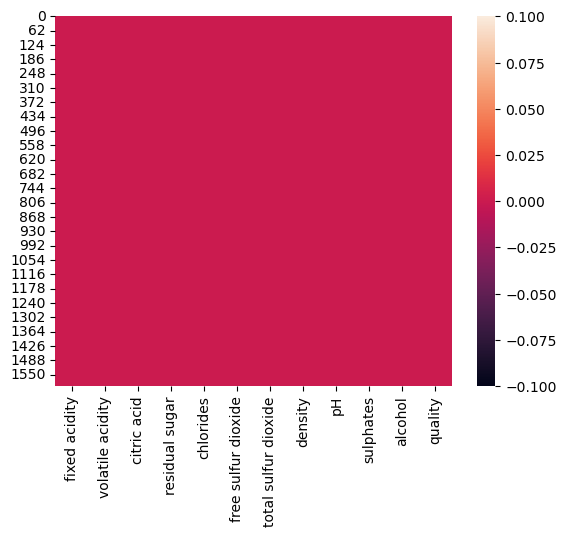

In [10]:
sns.heatmap(rwqp.isnull())

so from heatmap as well we can see that there is no null values

In [11]:
# checking unique values
rwqp.nunique().to_frame('Total No. of Unique Values')

,Total No. of Unique Values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [12]:
# value count of each column
for i in rwqp.columns:
    print(rwqp[i].value_counts())
    print('\n')

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

In [13]:
rwqp.describe() # summary of numerical columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


 from above we can see that mean is higher then median in all the columns apart from quality column
 
 citric acid has min value of 0 that need to check if there is any data error or actual data
 
 There is no missing value in any columns
 

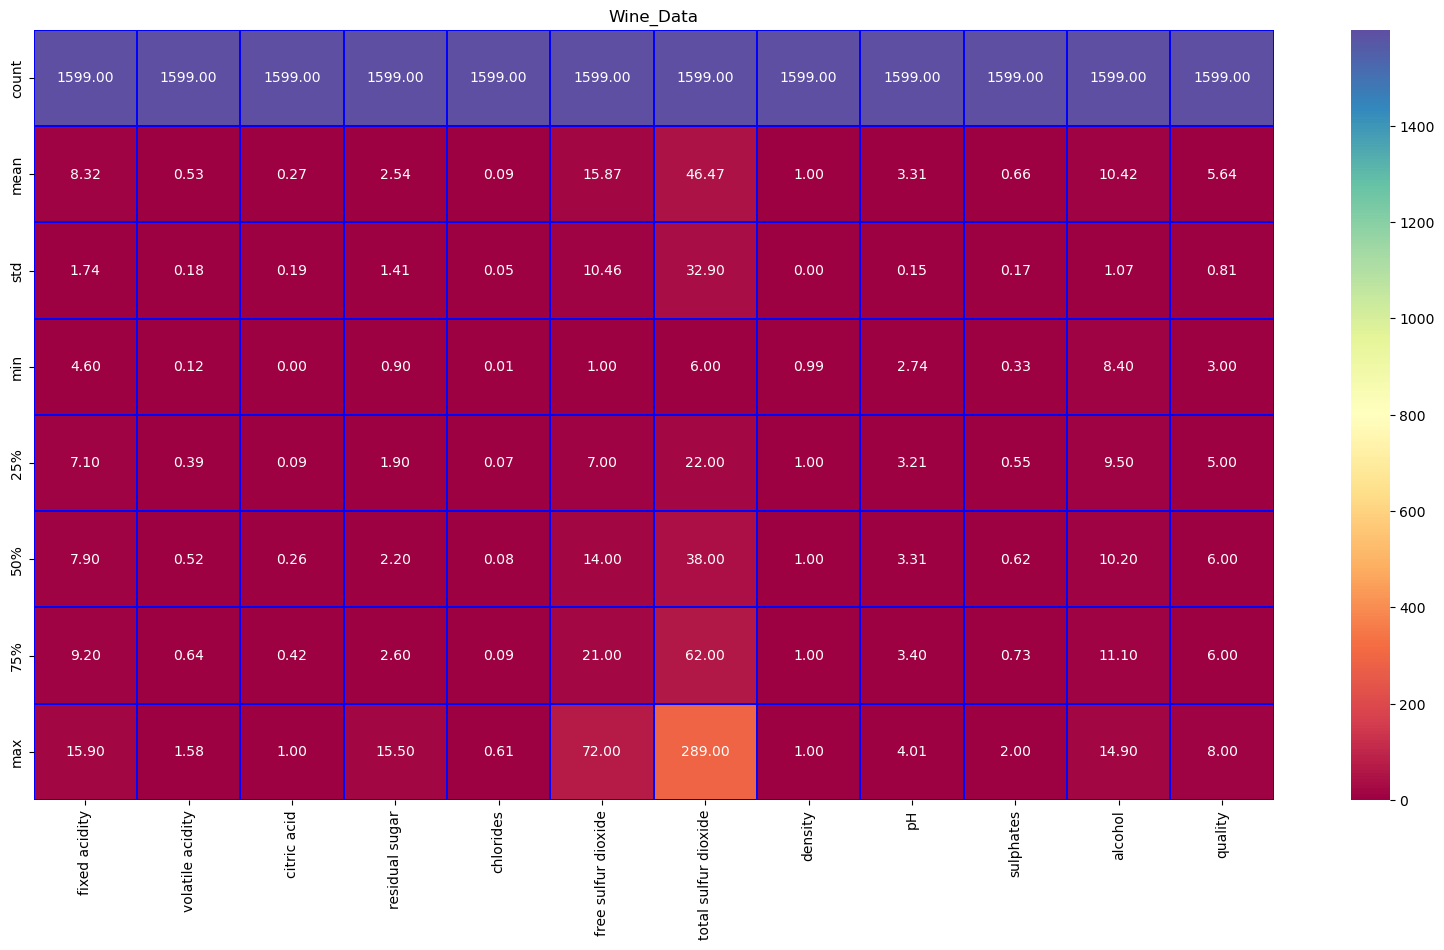

In [14]:
plt.figure(figsize = (20,10))
sns.heatmap(rwqp.describe(), annot = True, fmt ='0.2f', linewidth = 0.3, linecolor = 'blue', cmap = 'Spectral')
plt.xlable = ('Data')
plt.ylable = ('Column_Name') 
plt.title('Wine_Data') 
plt.show()

In [15]:
# Now let's check unique values in quality column (target variable)

rwqp['quality'].unique()
rwqp['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

 So as per problem text quality 7 or higher is count good wine(1) and rest as not good one(0)

before we go furthur need to check for blank values in quality column

In [16]:
rwqp.loc[rwqp['quality']==' ']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


there is no blank value in quality column

now we let's check dataset using lmplot method. Where we will check queality against all rest of the columns

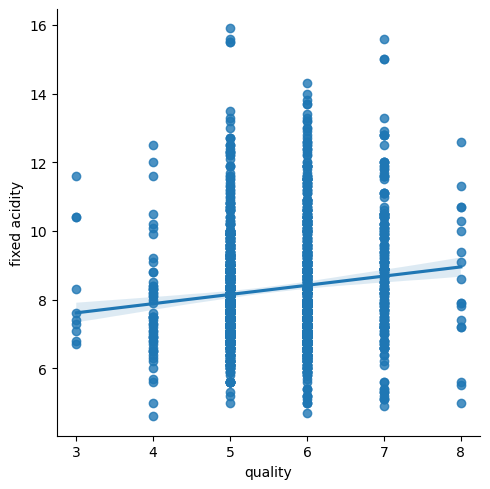

In [17]:
sns.lmplot(x= 'quality', y = 'fixed acidity', data = rwqp)

In [18]:
# I think we should try using scatterplot for this dataset

<Axes: xlabel='quality', ylabel='fixed acidity'>

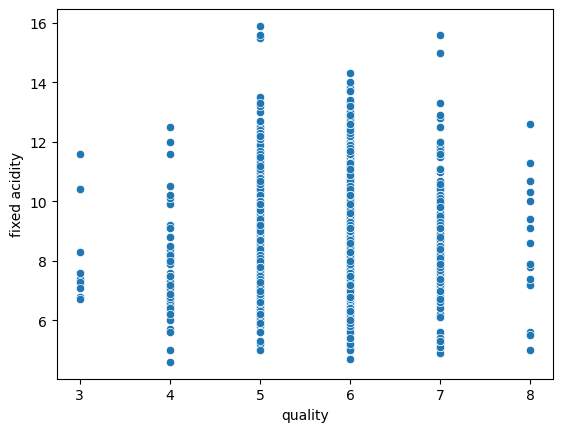

In [19]:
sns.scatterplot(x= 'quality', y = 'fixed acidity', data = rwqp)

In [20]:
# we can see that fixed acidity is higher in qulity 5 to 7

<Axes: xlabel='quality', ylabel='volatile acidity'>

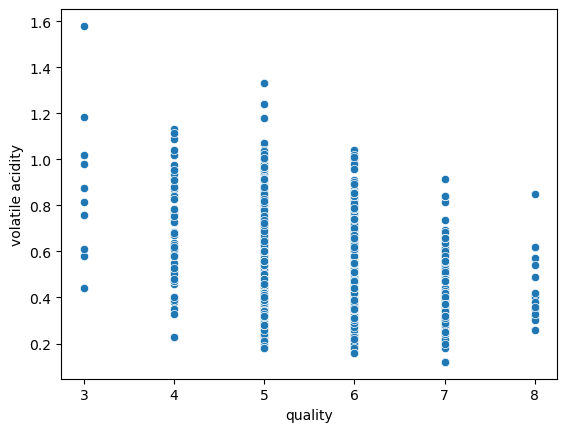

In [21]:
sns.scatterplot(x= 'quality', y = 'volatile acidity', data = rwqp)

In [22]:
# volatile acidity is higher in quality 4-5

<Axes: xlabel='quality', ylabel='citric acid'>

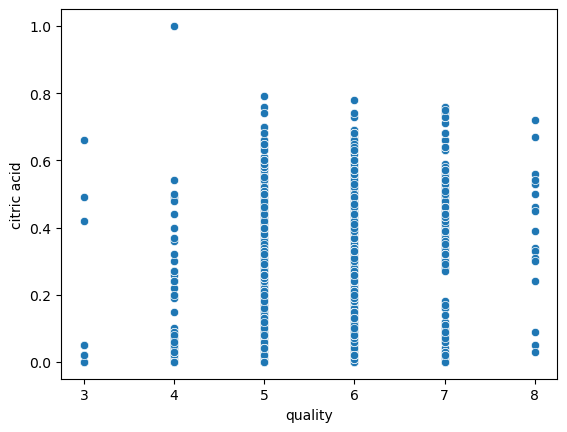

In [23]:
sns.scatterplot(x='quality', y= 'citric acid', data = rwqp)

In [24]:
#citric acid is higher in quality 5-7

<Axes: xlabel='quality', ylabel='residual sugar'>

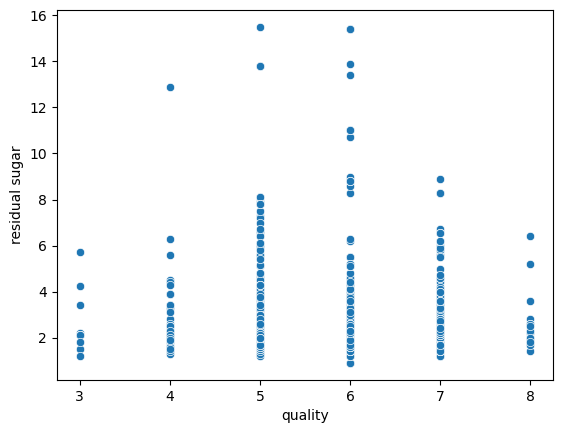

In [25]:
sns.scatterplot(x='quality', y='residual sugar', data = rwqp)

In [26]:
# we can see that residual sugar is high in 5&6

<Axes: xlabel='quality', ylabel='chlorides'>

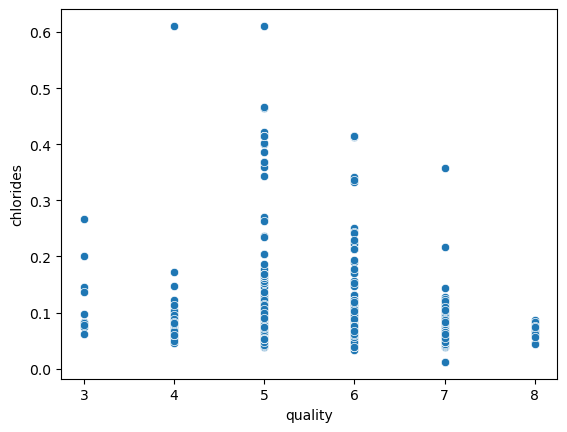

In [27]:
sns.scatterplot(x='quality', y='chlorides', data = rwqp)

In [28]:
# chlorides are high in quality 5 & 6

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

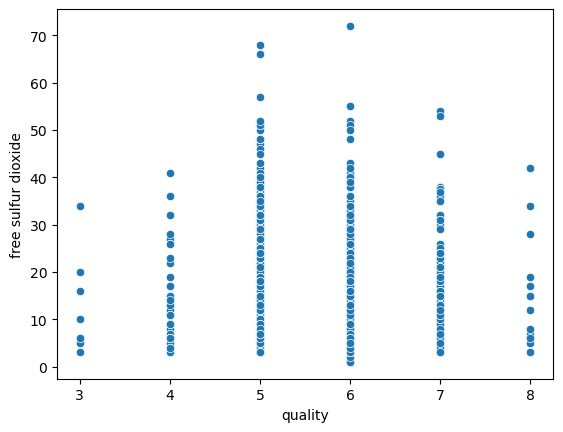

In [29]:
sns.scatterplot(x='quality', y='free sulfur dioxide', data = rwqp)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

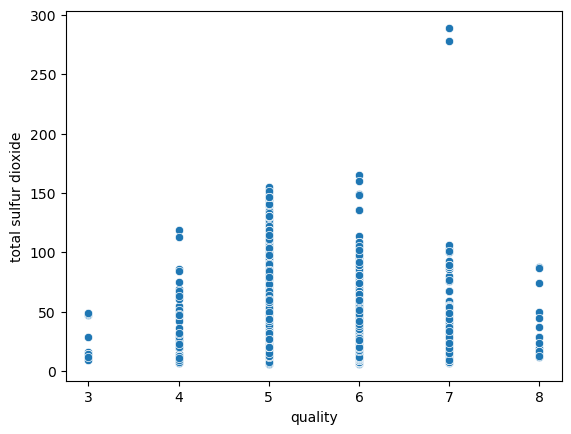

In [30]:
sns.scatterplot(x='quality', y='total sulfur dioxide', data = rwqp)

In [31]:
# total sulfur dioxide is high in 5 & 6

<Axes: xlabel='quality', ylabel='density'>

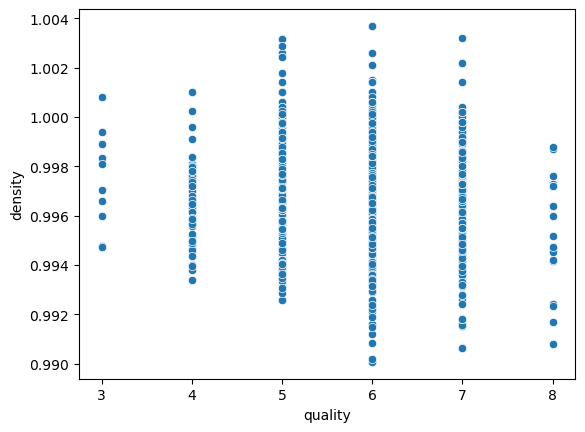

In [32]:
sns.scatterplot(x='quality', y='density', data = rwqp)

<Axes: xlabel='quality', ylabel='pH'>

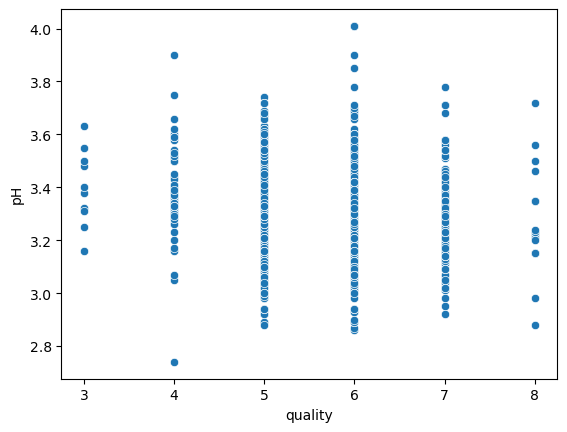

In [33]:
sns.scatterplot(x='quality', y='pH', data = rwqp)

<Axes: xlabel='quality', ylabel='sulphates'>

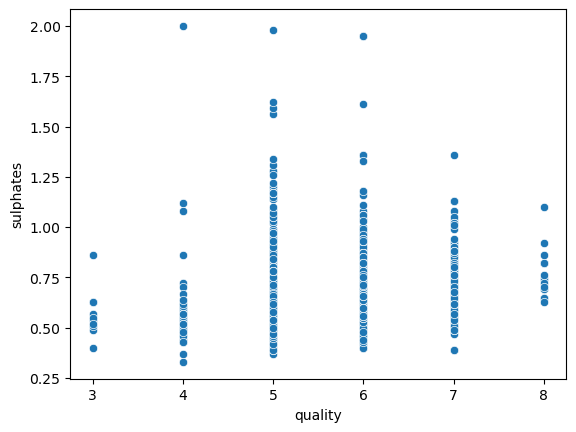

In [34]:
sns.scatterplot(x='quality', y='sulphates', data = rwqp)

<Axes: xlabel='quality', ylabel='alcohol'>

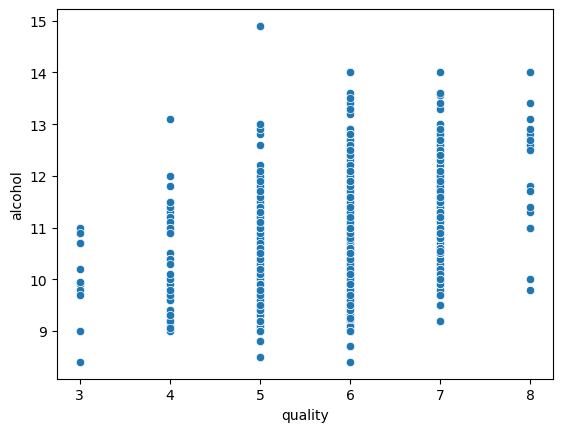

In [35]:
sns.scatterplot(x='quality', y='alcohol', data = rwqp)

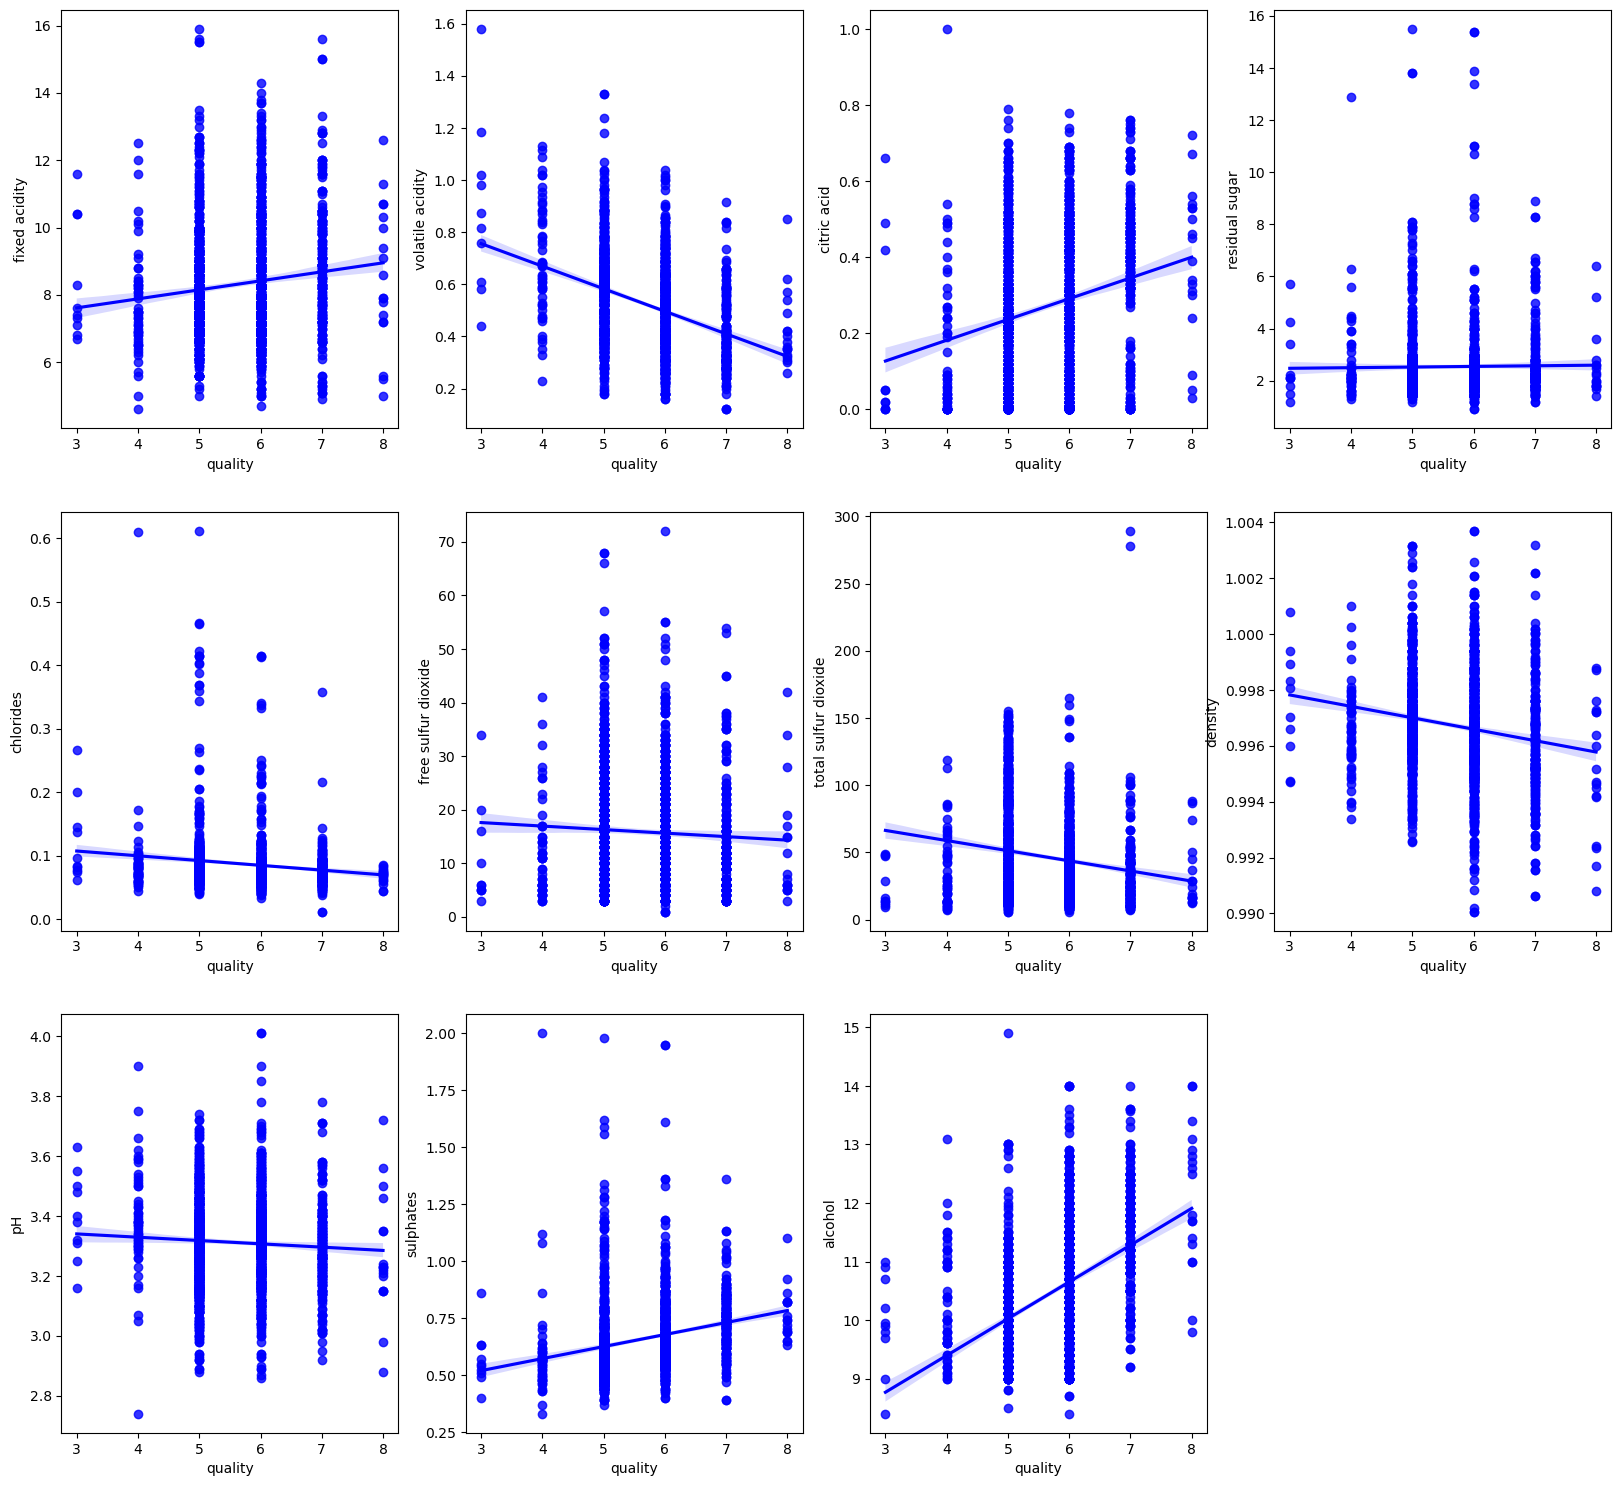

In [36]:
plt.figure(figsize=(20,25))
p=1
for i in rwqp:
    if p<=11:
        plt.subplot(4,4,p)
        sns.regplot(x='quality', y=i, data = rwqp, color='b')
        #plt.xlable('quality')
        #plt.ylable(i)
    p+=1
#plt.show()

result from both type of graph is almost same and below columns has no or very minimum contribtions on quality
1- residual sugar, 2- free sulfur dioxide, 3- pH, 4- chlorides
so we will drop above columns from our dataset

In [37]:
rwqp.drop(['residual sugar', 'free sulfur dioxide','chlorides', 'pH'], axis=1, inplace = True)
rwqp.head()

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,34.0,0.9978,0.56,9.4,5


now using pairplot method we will find out relationship between 2 variable from table.

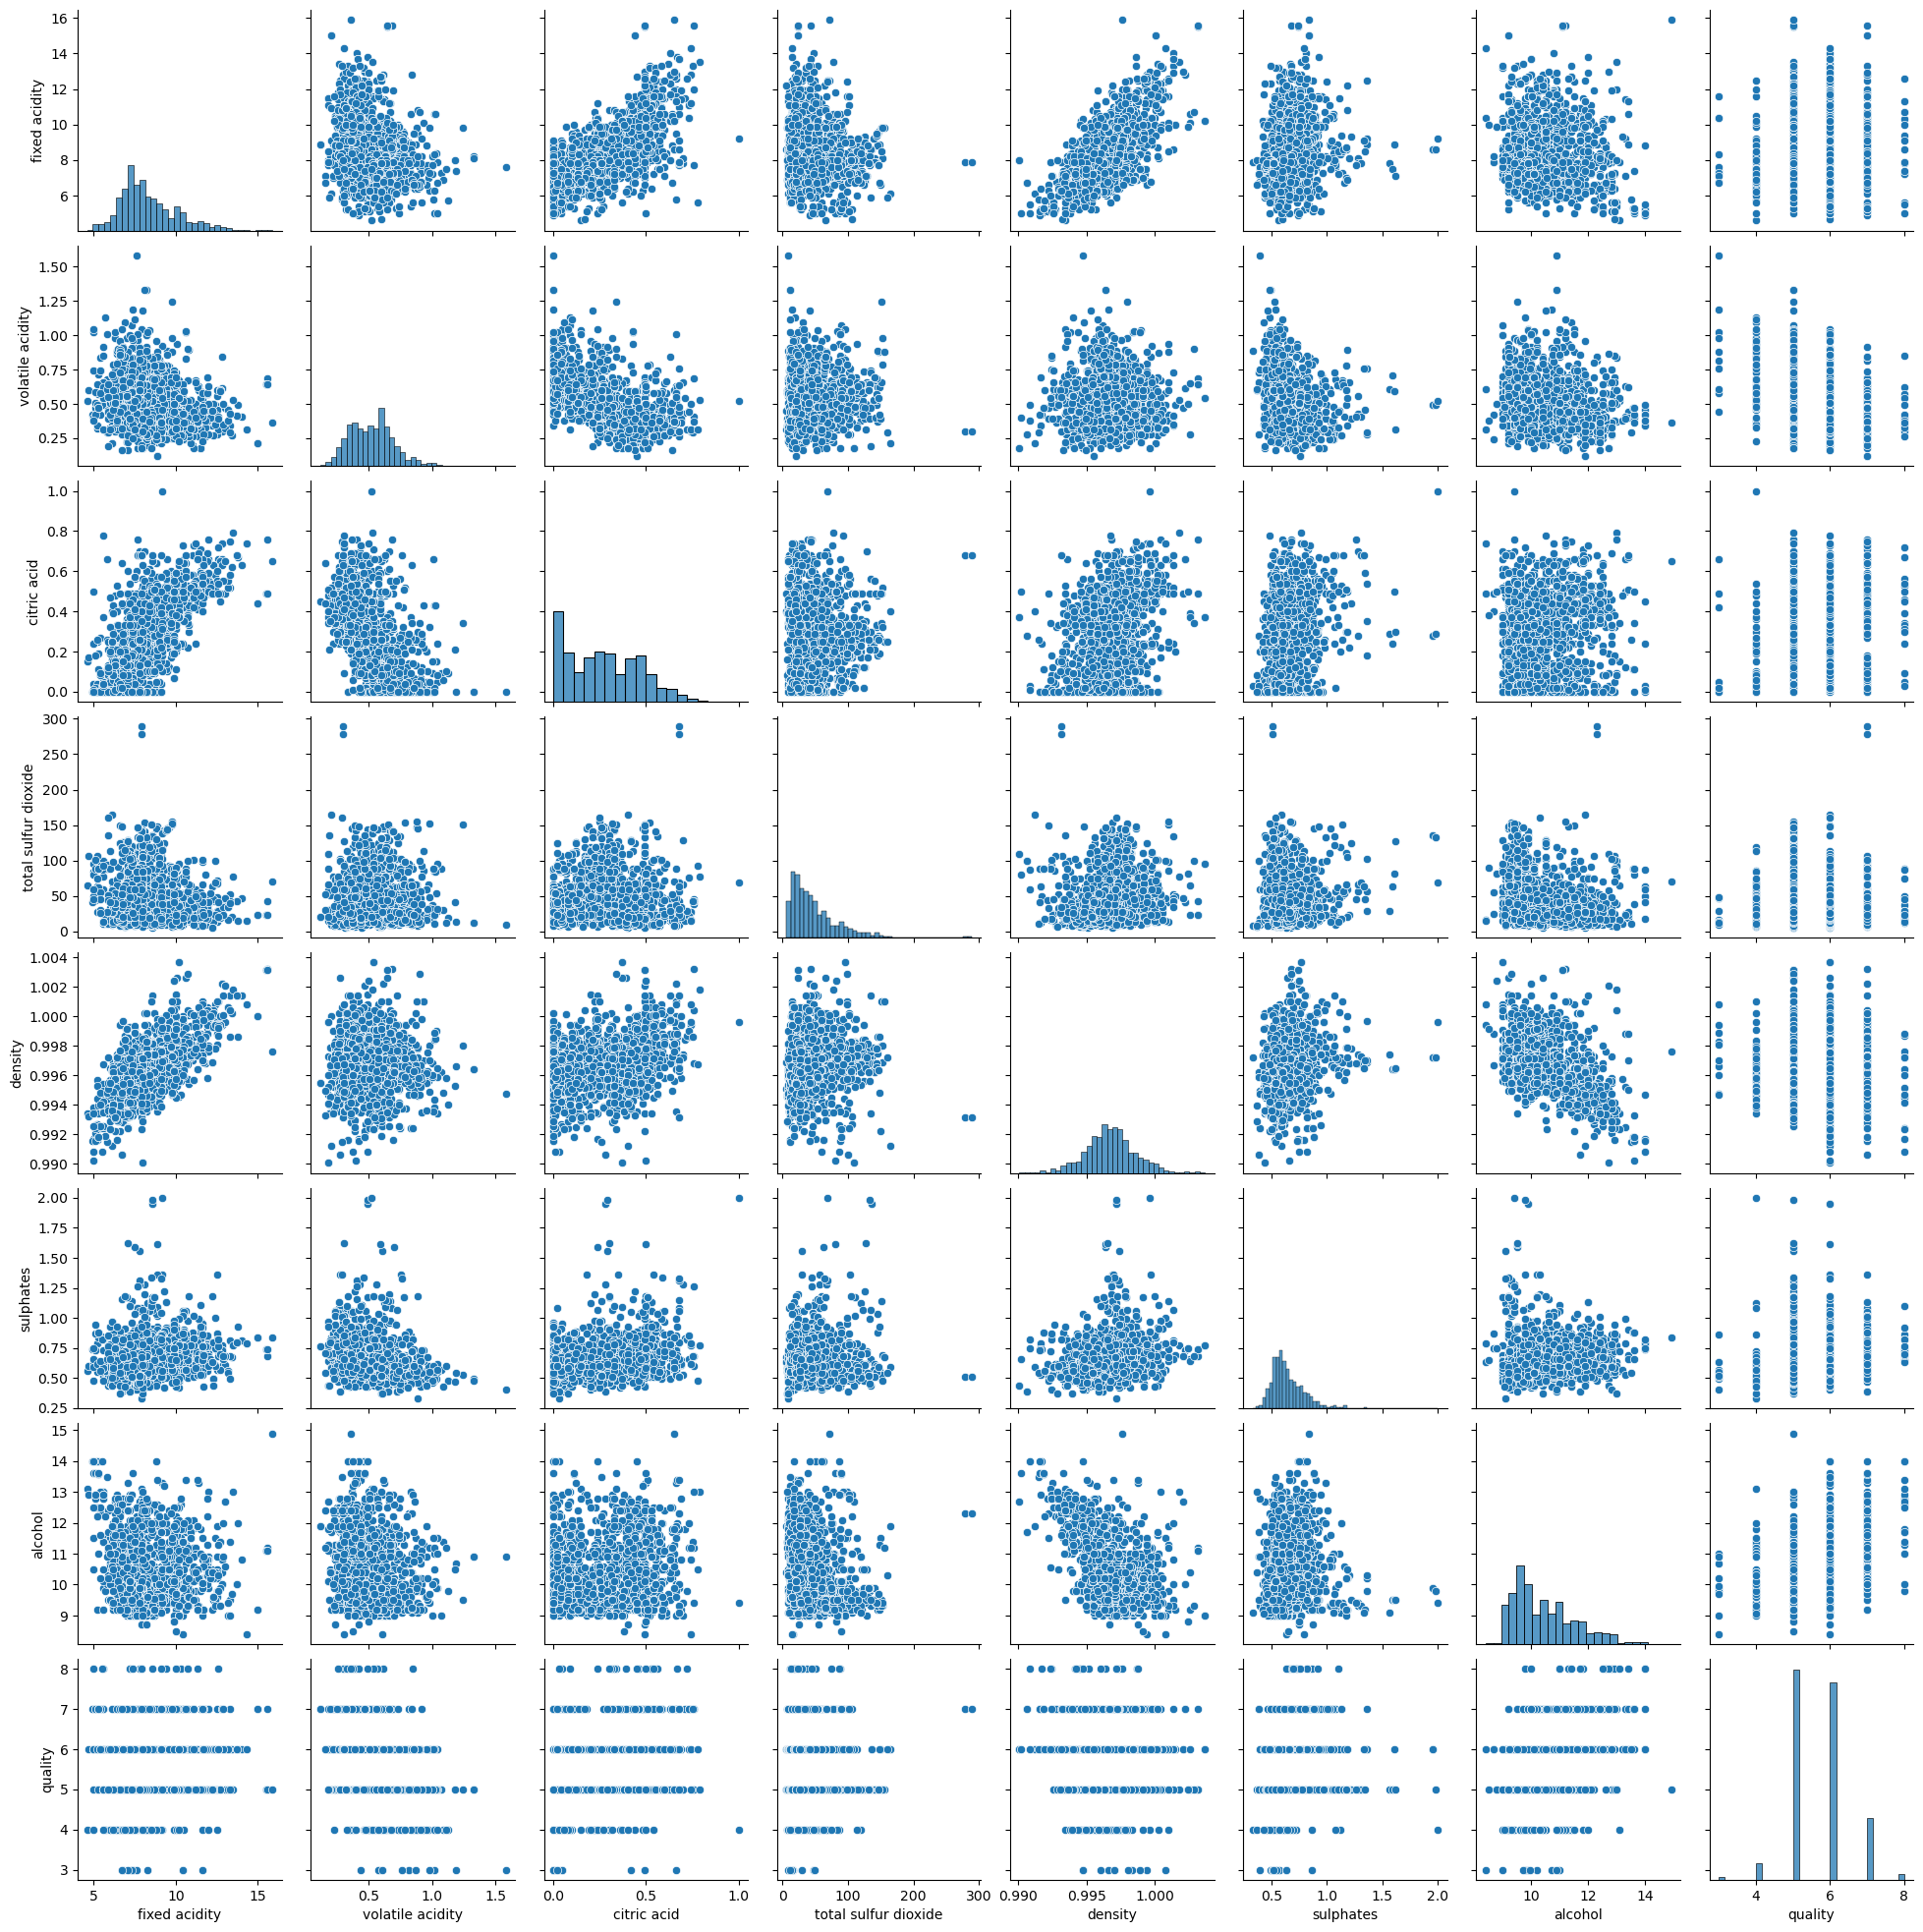

In [38]:
sns.pairplot(data = rwqp, palette = 'Dark1')   

for example in 1st row in graph, it has shown us relations ship of 'fixed acidity' with each column including you can see that it has given detail that how data is been distributed in 'fixed acidity' column it self. 


#we can do lineplot chart to inspect data if needed

plt.figure(figsize=(25,8))

sns.lineplot(data = rwqp.iloc[:,:-1]) #,color= ['blue'] , linewidth=2)

plt.ylabel('quality')

plt.title('Wine_quality')

In [39]:
# we will use boxplot to find out outliners


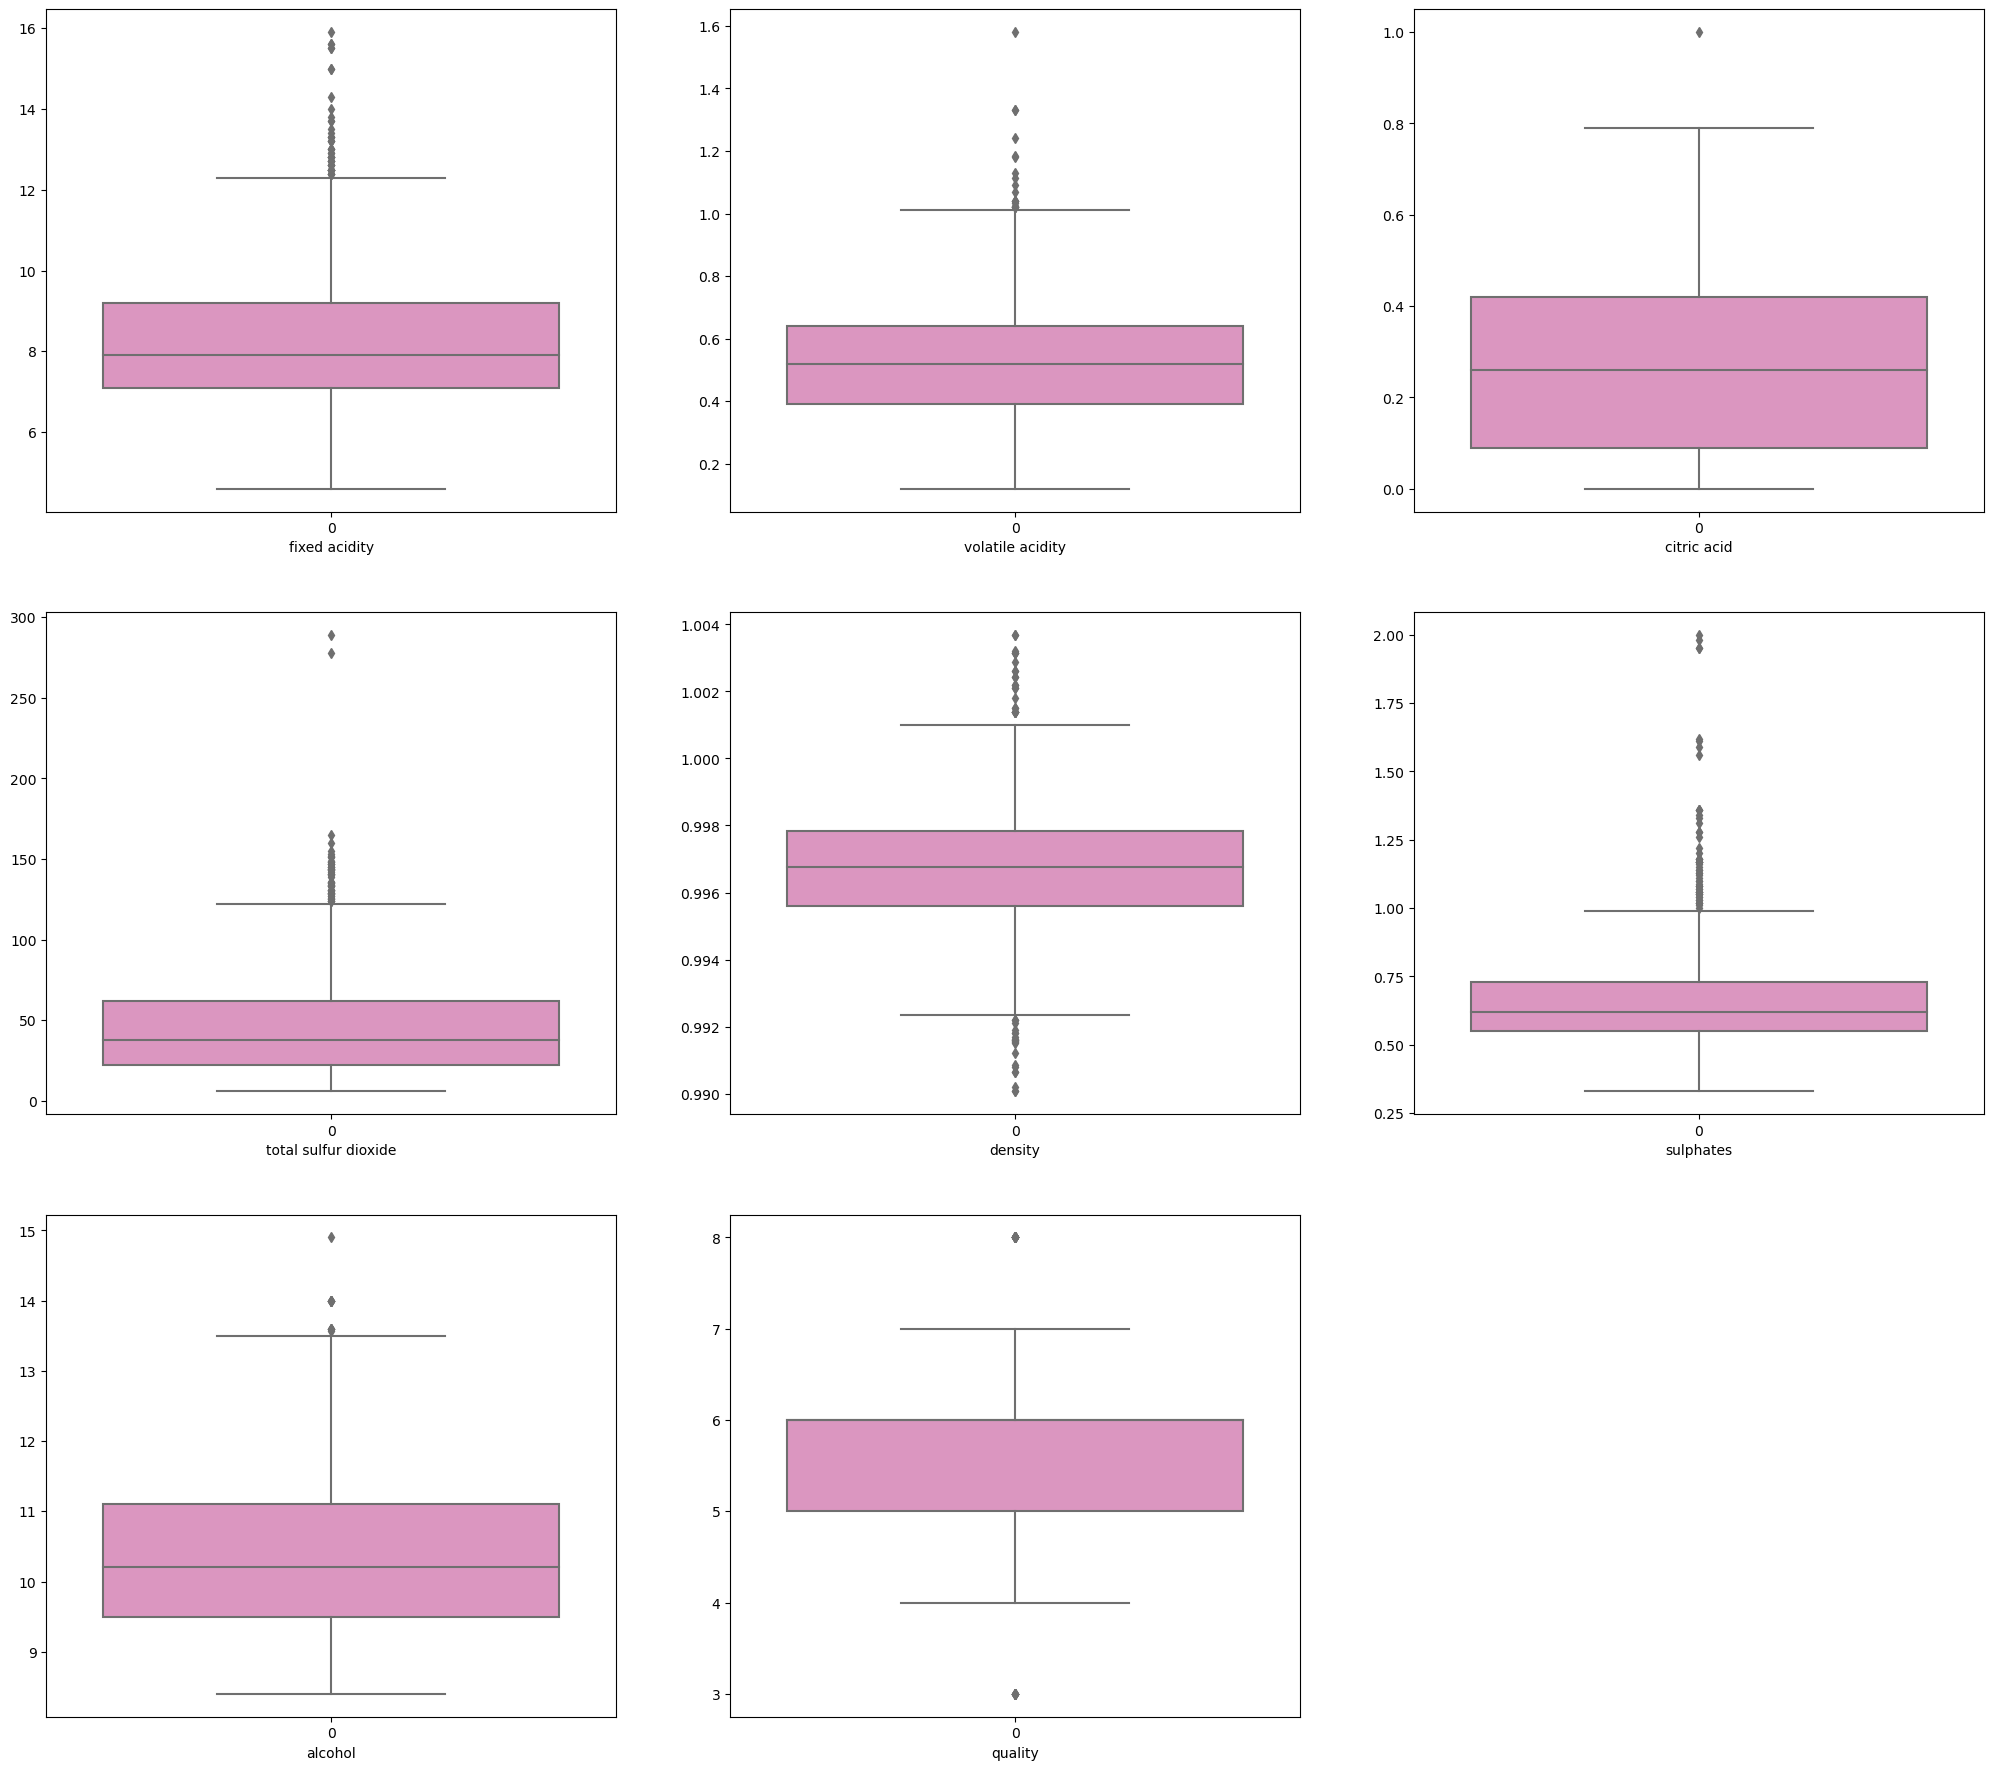

In [40]:
plt.figure(figsize=(25,30))
p=1
for i in rwqp:
    if p<=12:
        plt.subplot(4,3,p)
        sns.boxplot(rwqp[i], palette = 'Set2_r')
        plt.xlabel(i)
    p+=1
plt.show()

From the above outcome we can see that following columns has less or no outliers :-

'citric acid',, 'alcohol',

following columns has more outliers :-

'density','total sulfur dioxide','fixed acidity','volatile acidity','sulphates'

while the  our target variable columns (quality) has no outliers.

In [41]:
# now as we have found outliers in most of the column we need to clean our data

In [42]:
# we will use zscore and IQRmethod to remove outliers and method which gives less data loss we will use that one

In [43]:
from scipy.stats import zscore

In [44]:
rwqp1 = rwqp.copy()
z_score = zscore(rwqp1)
z_score_abs = np.abs(z_score)
rwqp_new = rwqp1[(z_score_abs<3).all(axis=1)]  # 3 is thresold value 
rwqp_new.shape
rwqp_new['quality'].value_counts()

5    643
6    611
7    190
4     49
8     16
Name: quality, dtype: int64

In [45]:
# our main dataset has 1599 rows where after removing outliers it's gone down to 1451

In [46]:
rwqp_new

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,60.0,0.99800,0.58,9.8,6
4,7.4,0.700,0.00,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,44.0,0.99490,0.58,10.5,5
1595,5.9,0.550,0.10,51.0,0.99512,0.76,11.2,6
1596,6.3,0.510,0.13,40.0,0.99574,0.75,11.0,6
1597,5.9,0.645,0.12,44.0,0.99547,0.71,10.2,5


In [47]:
#now let's check total how many rows has been removed

print('Original Dataset', rwqp.shape[0])
print('New Dataset', rwqp_new.shape[0])
print('No of rows removed', rwqp.shape[0]-rwqp_new.shape[0])
rwqp_new['quality'].value_counts()

Original Dataset 1599
New Dataset 1509
No of rows removed 90


5    643
6    611
7    190
4     49
8     16
Name: quality, dtype: int64

In [48]:
# now lets check % of data loss

print('Z_Score method data loss in % : -', 148/1599*100, '%')

Z_Score method data loss in % : - 9.255784865540964 %


In [49]:
# Now we will use IQR method

rwqp2 = rwqp.copy()
q1 = rwqp2.quantile(0.25)   # 1st quantile
q3 = rwqp2.quantile(0.75)   # 3rd quantile
iqr = q3-q1
print(iqr)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
total sulfur dioxide    40.000000
density                  0.002235
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [50]:
rwqp_n = rwqp2[~((rwqp<(q1-1.5*iqr))|(rwqp>(q3+1.5*iqr))).any(axis=1)]
rwqp_n.shape

(1377, 8)

In [51]:
print('Original Data', rwqp.shape[0])
print('New data', rwqp_n.shape[0])
print('Diffrence', rwqp.shape[0]-rwqp_n.shape[0])

Original Data 1599
New data 1377
Diffrence 222


In [52]:
print('Total Data loss % in IQR method :', 420/1599*100,'%')

Total Data loss % in IQR method : 26.26641651031895 %


 We can see from above resuls that IQR method has very high data loss(in any method where we have loss above 10% is not to be consider)

In [53]:
#Now as we have establised that Z-Score is best method so we will transfer data from Z-score data base to our main dataset
rwqp= rwqp_new

In [54]:
rwqp

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,60.0,0.99800,0.58,9.8,6
4,7.4,0.700,0.00,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,44.0,0.99490,0.58,10.5,5
1595,5.9,0.550,0.10,51.0,0.99512,0.76,11.2,6
1596,6.3,0.510,0.13,40.0,0.99574,0.75,11.0,6
1597,5.9,0.645,0.12,44.0,0.99547,0.71,10.2,5


In [55]:
# Now we know that quality above 7 is good [1] and below is not good[0] we will distribute data accordigly.

In [56]:
rwqp ['class'] = [1 if x >6 else 0  for x in rwqp.quality]
rwqp

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality,class
0,7.4,0.700,0.00,34.0,0.99780,0.56,9.4,5,0
1,7.8,0.880,0.00,67.0,0.99680,0.68,9.8,5,0
2,7.8,0.760,0.04,54.0,0.99700,0.65,9.8,5,0
3,11.2,0.280,0.56,60.0,0.99800,0.58,9.8,6,0
4,7.4,0.700,0.00,34.0,0.99780,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,44.0,0.99490,0.58,10.5,5,0
1595,5.9,0.550,0.10,51.0,0.99512,0.76,11.2,6,0
1596,6.3,0.510,0.13,40.0,0.99574,0.75,11.0,6,0
1597,5.9,0.645,0.12,44.0,0.99547,0.71,10.2,5,0


In [57]:
rwqp['class'].value_counts()

0    1303
1     206
Name: class, dtype: int64

In [58]:
# now we will set class as index for our dataset 
#rwqp.set_index('class', inplace=True)

#rwqp

In [59]:
#drop quality column
rwqp.drop(['quality'], axis=1, inplace = True)
rwqp

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,class
0,7.4,0.700,0.00,34.0,0.99780,0.56,9.4,0
1,7.8,0.880,0.00,67.0,0.99680,0.68,9.8,0
2,7.8,0.760,0.04,54.0,0.99700,0.65,9.8,0
3,11.2,0.280,0.56,60.0,0.99800,0.58,9.8,0
4,7.4,0.700,0.00,34.0,0.99780,0.56,9.4,0
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,44.0,0.99490,0.58,10.5,0
1595,5.9,0.550,0.10,51.0,0.99512,0.76,11.2,0
1596,6.3,0.510,0.13,40.0,0.99574,0.75,11.0,0
1597,5.9,0.645,0.12,44.0,0.99547,0.71,10.2,0


In [60]:
# Now we will use Mean values based on class

In [61]:
mean = pd.pivot_table(data=rwqp,index ='class', aggfunc ={'fixed acidity':np.mean,'volatile acidity':np.mean,'citric acid':np.mean,
                                          'total sulfur dioxide':np.mean, 'density':np.mean,'sulphates':np.mean,
                                                          'alcohol':np.mean})
mean

,alcohol,citric acid,density,fixed acidity,sulphates,total sulfur dioxide,volatile acidity
class,,,,,,,
0,10.247723,0.248396,0.996818,8.191328,0.629332,46.752878,0.541512
1,11.504935,0.375388,0.996087,8.820874,0.745194,31.577670,0.408374


In [62]:
# we will check for Skewness 
rwqp.skew()

fixed acidity           0.802780
volatile acidity        0.354244
citric acid             0.302192
total sulfur dioxide    1.135974
density                 0.038837
sulphates               0.962018
alcohol                 0.764831
class                   2.119497
dtype: float64

we can see fromabove result that there is a skew in our data. (skewness threshold is +/- 0.5)
following columns has more skew
- fixed acidity
- total sulfur dioxide
- sulphates
- alcohol

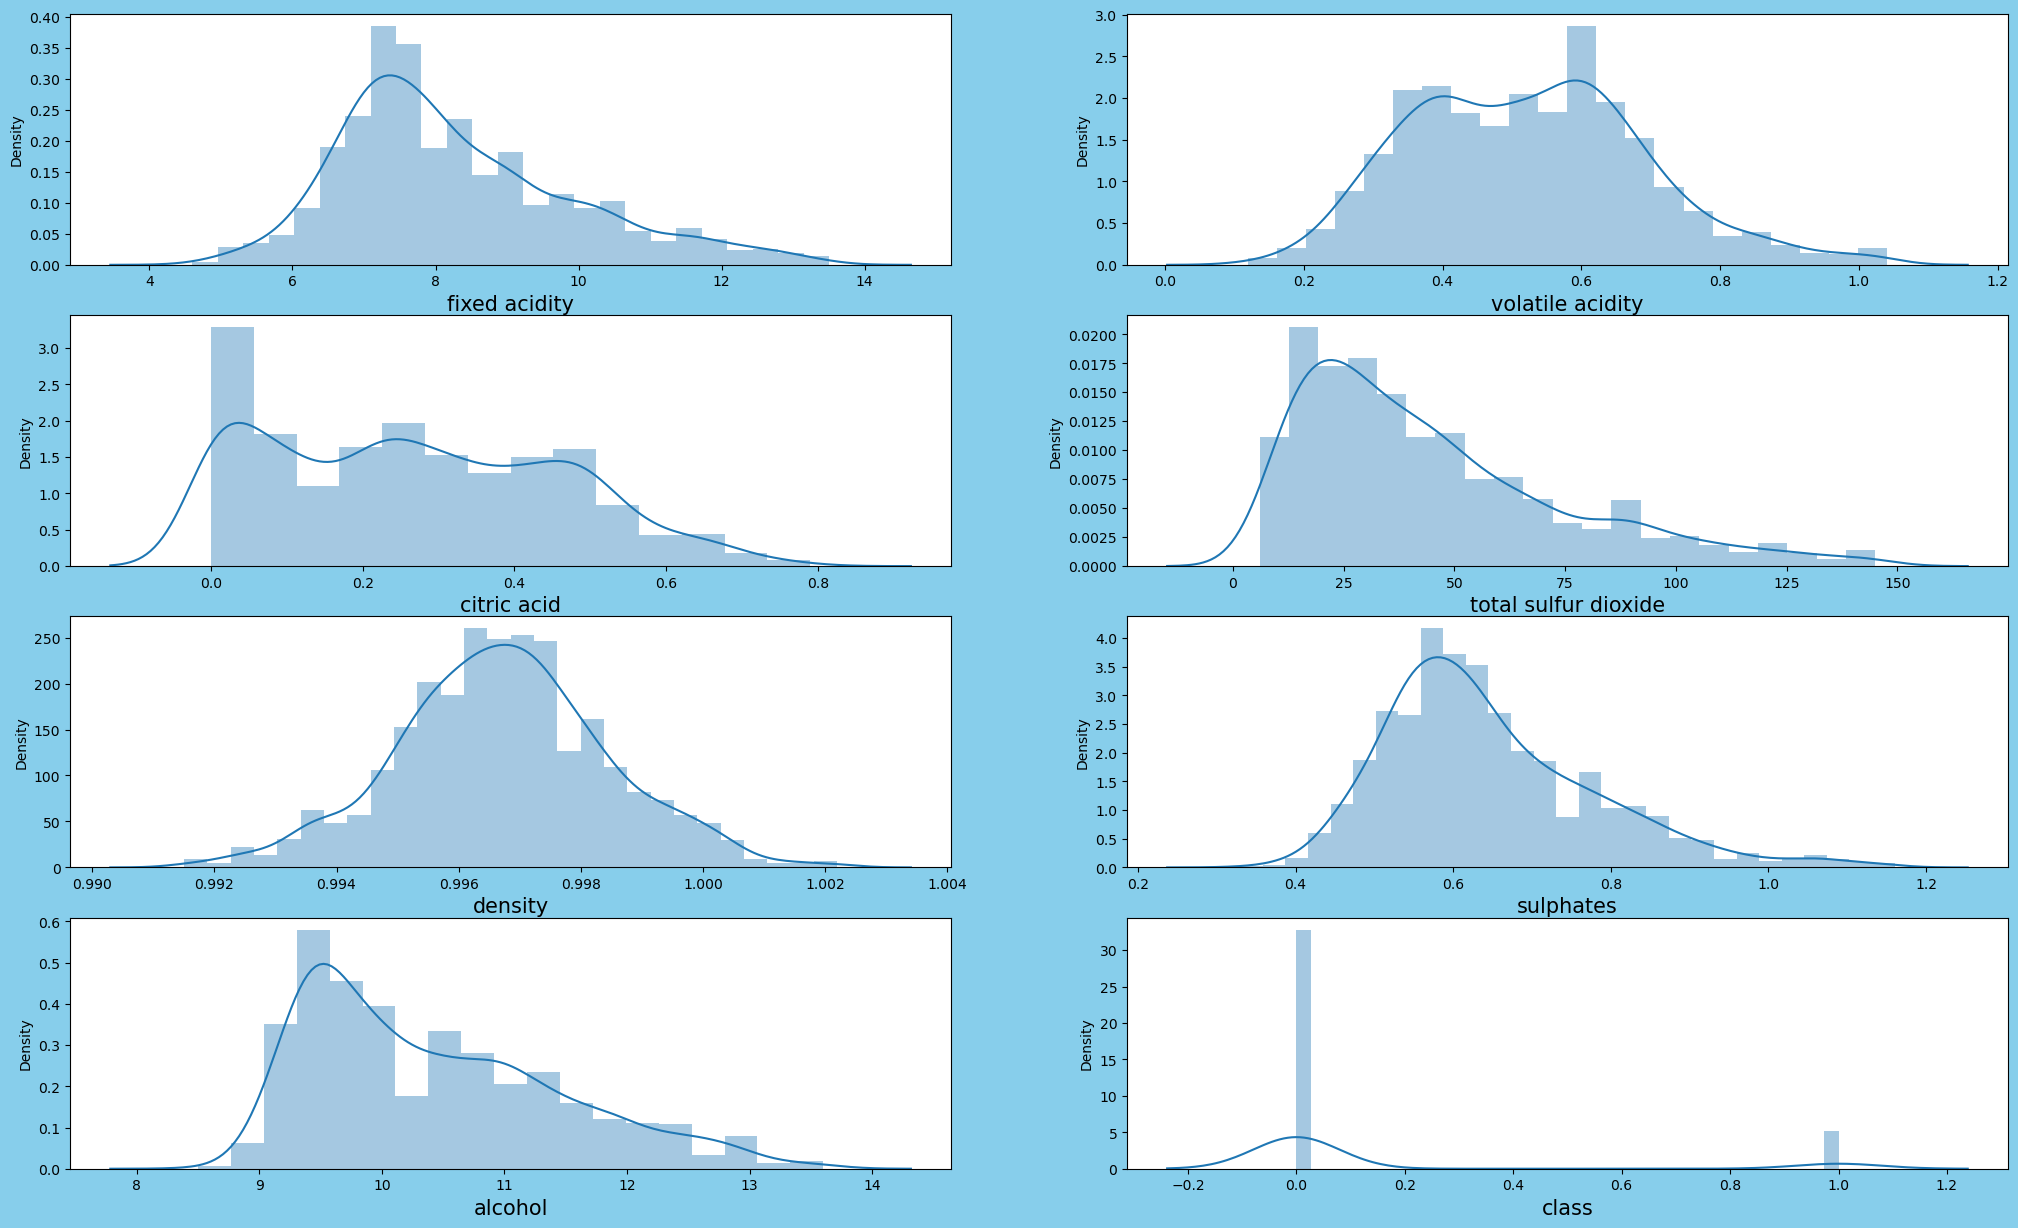

In [63]:
# we will check for data distribution as we know we have skew in our dataset

plt.figure(figsize=(25,15), facecolor = 'skyblue')
plotnumber = 1
for x in rwqp:
    if plotnumber <=8:
        x1= plt.subplot(4,2,plotnumber)
        sns.distplot(rwqp[x])
        plt.xlabel(x,fontsize=15)
        plotnumber+=1
plt.show()

we can see that data is not distributed properly some has left skew where others have right

In [64]:
# checking correlations
rwqp.corr()

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,class
fixed acidity,1.000000,-0.296483,0.685467,-0.115825,0.654933,0.200102,-0.035158,0.130992
volatile acidity,-0.296483,1.000000,-0.588568,0.115547,-0.004092,-0.338733,-0.206643,-0.271525
citric acid,0.685467,-0.588568,1.000000,-0.005314,0.364467,0.316677,0.146761,0.227767
total sulfur dioxide,-0.115825,0.115547,-0.005314,1.000000,0.121821,-0.044070,-0.258414,-0.173391
density,0.654933,-0.004092,0.364467,0.121821,1.000000,0.126217,-0.481560,-0.144779
sulphates,0.200102,-0.338733,0.316677,-0.044070,0.126217,1.000000,0.207024,0.297189
alcohol,-0.035158,-0.206643,0.146761,-0.258414,-0.481560,0.207024,1.000000,0.418833
class,0.130992,-0.271525,0.227767,-0.173391,-0.144779,0.297189,0.418833,1.000000


In [65]:
x= rwqp.drop(columns = ['class'])
y= rwqp['class']

In [66]:
#  we will now remove skewness

from sklearn.preprocessing import power_transform

In [67]:
# with use of power transform we can skip use of standard scaler
# class sklearn.preprocessing.PowerTransformer(method = 'yeo-johnson',*,standardize= True, copy=True)

x= power_transform(x, method= 'yeo-johnson')   
x

array([[-0.44528087,  1.05307903, -1.52531377, ...,  0.62743291,
        -0.59072506, -1.10749594],
       [-0.15566343,  1.9286689 , -1.52531377, ...,  0.05304901,
         0.43755662, -0.51934376],
       [-0.15566343,  1.35760041, -1.24551944, ...,  0.16824635,
         0.21008385, -0.51934376],
       ...,
       [-1.39053099, -0.00980751, -0.66560315, ..., -0.56018653,
         0.90569766,  0.74427731],
       [-1.80235208,  0.76162611, -0.72693177, ..., -0.71711396,
         0.64826501, -0.02594042],
       [-1.69535035, -1.33086494,  1.06777284, ..., -0.70547956,
         0.28787035,  0.74427731]])

In [68]:
# now let's check skewness

pd.DataFrame(x).skew().sort_values()

3   -0.008442
4   -0.000658
1    0.003881
0    0.010327
2    0.019067
5    0.023332
6    0.119935
dtype: float64

### Now with Over Sampling usning SMOTE

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
smt = SMOTE()
x_sample, y_sample = smt.fit_resample(x,y)

### Now we will build model with diffrent alogorithms

## Logistic Regression

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
from sklearn.svm import SVC
s = SVC()
from sklearn.metrics import accuracy_score, classification_report

In [72]:
for i in range(0,2000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = i, test_size=0.30)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(accuracy_score(y_train, pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At Random state ',i, 'Model Training Accuracy is :', accuracy_score(y_train,pred_train)*100)
        print('At Random state ',i, 'Model Test Accuracy is     :', accuracy_score(y_test, pred_test)*100,'\n')
        

At Random state  120 Model Training Accuracy is : 88.54166666666666
At Random state  120 Model Test Accuracy is     : 88.52097130242825 

At Random state  150 Model Training Accuracy is : 88.54166666666666
At Random state  150 Model Test Accuracy is     : 88.52097130242825 

At Random state  200 Model Training Accuracy is : 87.87878787878788
At Random state  200 Model Test Accuracy is     : 87.85871964679912 

At Random state  204 Model Training Accuracy is : 88.25757575757575
At Random state  204 Model Test Accuracy is     : 88.30022075055187 

At Random state  237 Model Training Accuracy is : 88.54166666666666
At Random state  237 Model Test Accuracy is     : 88.52097130242825 

At Random state  241 Model Training Accuracy is : 88.25757575757575
At Random state  241 Model Test Accuracy is     : 88.30022075055187 

At Random state  282 Model Training Accuracy is : 88.54166666666666
At Random state  282 Model Test Accuracy is     : 88.52097130242825 

At Random state  455 Model Trainin

from above results we can see that where result is 88.74 and 88.73 is best result
based on the result, I will go with Model 1894

## Now Let's check with KNN

In [73]:
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state =i)
    knn.fit(x_train,y_train)
    x_pred = knn.predict(x_train)
    y_pred = knn.predict(x_test)
    print('At Random state',i, 'training model accuracy is:', accuracy_score(y_train,x_pred))
    print('At Random state',i, 'test model accuracy is    :', accuracy_score(y_test,y_pred),'\n')

At Random state 0 training model accuracy is: 0.9242424242424242
At Random state 0 test model accuracy is    : 0.8719646799116998 

At Random state 1 training model accuracy is: 0.9090909090909091
At Random state 1 test model accuracy is    : 0.8741721854304636 

At Random state 2 training model accuracy is: 0.9138257575757576
At Random state 2 test model accuracy is    : 0.8852097130242825 

At Random state 3 training model accuracy is: 0.915719696969697
At Random state 3 test model accuracy is    : 0.8785871964679912 

At Random state 4 training model accuracy is: 0.90625
At Random state 4 test model accuracy is    : 0.8874172185430463 

At Random state 5 training model accuracy is: 0.9308712121212122
At Random state 5 test model accuracy is    : 0.8454746136865342 

At Random state 6 training model accuracy is: 0.9100378787878788
At Random state 6 test model accuracy is    : 0.8719646799116998 

At Random state 7 training model accuracy is: 0.9176136363636364
At Random state 7 test 

From above results we can see that Model 82 is best out put Model so I will go with it.

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3, random_state=82)



In [75]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [76]:
knn.score(x_train,y_train)

0.90625

In [77]:
#above is traing score

In [78]:
knn.score(x_test,y_test)

0.9050772626931567

In [79]:
#above is test score

## Now Let's try Decision Tree

In [80]:
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3, random_state =1)
    dt.fit(x_train,y_train)
    x_pre = dt.predict(x_train)
    y_pre = dt.predict(x_test)
    print('At Random state',i,'Train Accuracy is:',accuracy_score(y_train,x_pre))
    print('At Random state',i,'Test Accuracy is :',accuracy_score(y_test,y_pre),'\n')


At Random state 0 Train Accuracy is: 1.0
At Random state 0 Test Accuracy is : 0.8719646799116998 

At Random state 1 Train Accuracy is: 1.0
At Random state 1 Test Accuracy is : 0.8763796909492274 

At Random state 2 Train Accuracy is: 1.0
At Random state 2 Test Accuracy is : 0.8763796909492274 

At Random state 3 Train Accuracy is: 1.0
At Random state 3 Test Accuracy is : 0.8741721854304636 

At Random state 4 Train Accuracy is: 1.0
At Random state 4 Test Accuracy is : 0.8807947019867549 

At Random state 5 Train Accuracy is: 1.0
At Random state 5 Test Accuracy is : 0.8785871964679912 

At Random state 6 Train Accuracy is: 1.0
At Random state 6 Test Accuracy is : 0.8719646799116998 

At Random state 7 Train Accuracy is: 1.0
At Random state 7 Test Accuracy is : 0.8807947019867549 

At Random state 8 Train Accuracy is: 1.0
At Random state 8 Test Accuracy is : 0.8675496688741722 

At Random state 9 Train Accuracy is: 1.0
At Random state 9 Test Accuracy is : 0.8874172185430463 

At Random 

from above result most accurate is Model 179

In [81]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.3, random_state= 179
                                               )
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [82]:
print('Train data score :', dt.score(x_train,y_train))
print('Test data score  :', dt.score(x_test,y_test))

Train data score : 1.0
Test data score  : 0.8830022075055187


In [ ]:
# Performing Hyperparameter Tuning

In [83]:
from sklearn.model_selection import GridSearchCV

In [97]:
grid_param= { 'criterion':['ginni','entropy'], 'max_depth': range(15,20),'min_samples_leaf':range(2,6), 
            'min_samples_split':range(3,8), 'max_leaf_nodes':range(5,10)}

In [98]:
grid_search = GridSearchCV(estimator = dt, param_grid = grid_param, cv=10, n_jobs= -1)

In [99]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(15, 20),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [100]:
#Now checking DecisionTreeClassifier with new parameter

In [101]:
cnn= DecisionTreeClassifier(criterion = 'gini', max_depth = 15, max_leaf_nodes = 12, min_samples_split = 12)

In [102]:
best_parameter = grid_search.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 15, 'max_leaf_nodes': 9, 'min_samples_leaf': 3, 'min_samples_split': 3}


In [104]:
# Now lets train the model
cnn.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=12, min_samples_split=12)

In [106]:
print('On train model score: ', cnn.score(x_train,y_train))

On train model score:  0.9109848484848485


In [107]:
print('On test model score: ', cnn.score(x_test,y_test))

On test model score:  0.8763796909492274


### Now with Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [109]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state =i)
    rf.fit(x_train,y_train)
    x_pred= rf.predict(x_train)
    y_pred = rf.predict(x_test)
    print('At Random state', i ,'Training data accuracy is:',accuracy_score(y_train,x_pred))
    print('At Random state', i , 'Test Data accuracy is   :',accuracy_score(y_test,y_pred),'\n')

At Random state 0 Training data accuracy is: 1.0
At Random state 0 Test Data accuracy is   : 0.9072847682119205 

At Random state 1 Training data accuracy is: 1.0
At Random state 1 Test Data accuracy is   : 0.9227373068432672 

At Random state 2 Training data accuracy is: 1.0
At Random state 2 Test Data accuracy is   : 0.9315673289183223 

At Random state 3 Training data accuracy is: 1.0
At Random state 3 Test Data accuracy is   : 0.9183222958057395 

At Random state 4 Training data accuracy is: 1.0
At Random state 4 Test Data accuracy is   : 0.9249448123620309 

At Random state 5 Training data accuracy is: 1.0
At Random state 5 Test Data accuracy is   : 0.8852097130242825 

At Random state 6 Training data accuracy is: 1.0
At Random state 6 Test Data accuracy is   : 0.9227373068432672 

At Random state 7 Training data accuracy is: 1.0
At Random state 7 Test Data accuracy is   : 0.9116997792494481 

At Random state 8 Training data accuracy is: 1.0
At Random state 8 Test Data accuracy is

In [110]:
# As results are more accurate on model 36
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state= 36)

In [111]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [112]:
print('Train data score',rf.score(x_train,y_train))
print(' Test data score', rf.score(x_test,y_test))

Train data score 1.0
 Test data score 0.9271523178807947


In [113]:
# Hyperparameter Tuning
grid_param= { 'criterion':['ginni','entropy'], 'max_depth': range(15,20),'min_samples_leaf':range(2,6), 
            'min_samples_split':range(3,8), 'max_leaf_nodes':range(5,10)}

In [114]:
grid_search = GridSearchCV(estimator = dt, param_grid = grid_param, cv=10, n_jobs= -1)

In [116]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(15, 20),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [117]:
best_parameter = grid_search.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 15, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [118]:
# now with new parameters
rf = RandomForestClassifier(criterion='gini',max_depth= 25, max_leaf_nodes =78, min_samples_split =20)

In [119]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=25, max_leaf_nodes=78, min_samples_split=20)

In [120]:
print('score on training model:', rf.score(x_train,y_train))
print('score on testdata model:', rf.score(x_test,y_test))

score on training model: 0.9365530303030303
score on testdata model: 0.9094922737306843


### Now Let's check with SVM

In [121]:
from sklearn.svm  import SVC
s=SVC()

In [122]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3, random_state =i)
    s.fit(x_train,y_train)
    x_pre = s.predict(x_train)
    y_pre = s.predict(x_test)
    print('At random state',i,'Train accuracy is:', accuracy_score(y_train,x_pre))
    print('At random state',i,'Test accuracy is :', accuracy_score(y_test,y_pre),'\n')

At random state 0 Train accuracy is: 0.896780303030303
At random state 0 Test accuracy is : 0.8763796909492274 

At random state 1 Train accuracy is: 0.8920454545454546
At random state 1 Test accuracy is : 0.8962472406181016 

At random state 2 Train accuracy is: 0.8910984848484849
At random state 2 Test accuracy is : 0.9028697571743929 

At random state 3 Train accuracy is: 0.8920454545454546
At random state 3 Test accuracy is : 0.8962472406181016 

At random state 4 Train accuracy is: 0.8929924242424242
At random state 4 Test accuracy is : 0.9006622516556292 

At random state 5 Train accuracy is: 0.9015151515151515
At random state 5 Test accuracy is : 0.8719646799116998 

At random state 6 Train accuracy is: 0.8977272727272727
At random state 6 Test accuracy is : 0.8896247240618101 

At random state 7 Train accuracy is: 0.8986742424242424
At random state 7 Test accuracy is : 0.8852097130242825 

At random state 8 Train accuracy is: 0.8958333333333334
At random state 8 Test accuracy i

Best result is @ Random state 99

In [123]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=99)

In [124]:
s.fit(x_train,y_train)

SVC()

In [125]:
print('Train score', s.score(x_train,y_train))
print('Test score', s.score(x_test,y_test))

Train score 0.8958333333333334
Test score 0.8940397350993378


In [126]:
# applying Hps-T
from sklearn.metrics import accuracy_score,classification_report

In [127]:
param_grid = {'C':[10,15,20], 'gamma':[0.001,0.01,0.02,0.002]}

In [128]:
gridsearch= GridSearchCV(s,param_grid)

In [129]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10, 15, 20],
                         'gamma': [0.001, 0.01, 0.02, 0.002]})

In [130]:
svc = SVC(C=12,gamma=0.05)
svc.fit(x_train,y_train)

SVC(C=12, gamma=0.05)

In [131]:
print('Score on training:', svc.score(x_train,y_train))
print('Score on testdata:', svc.score(x_test,y_test))

Score on training: 0.8977272727272727
Score on testdata: 0.8852097130242825


### AUC ROC curve

In [132]:
from sklearn.metrics import roc_curve,auc

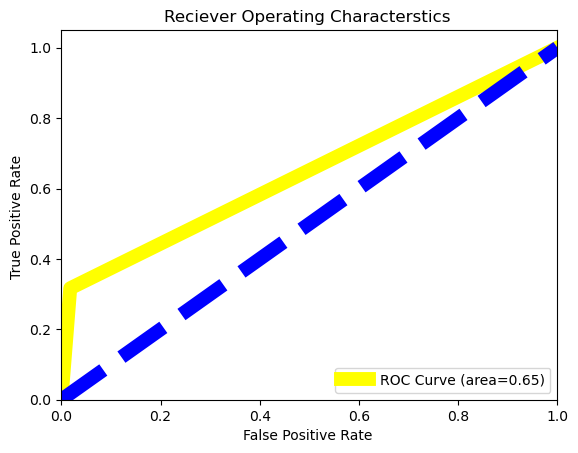

In [133]:
fpr,tpr,threshold = roc_curve(y_test,y_pre)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='yellow',lw=10,label='ROC Curve (area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.title("Reciever Operating Characterstics ")
plt.legend(loc='lower right')
plt.show()

in above chart Blue line is in our half of dataset and yellow line is how much our model has learn the data.
we can see that model has very good leraning rate and accuracy

In [430]:
#Time to save model

In [134]:
import pickle
filename = 'Red_Wine_Quality.pkl'
pickle.dump(rf,open(filename,'wb'))

### Conclusion

In [137]:
loaded_model=pickle.load(open('Red_Wine_Quality.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

92.27373068432672


In [138]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_pred[:]], index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,443,444,445,446,447,448,449,450,451,452
Predicted,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Original,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


We use SVM Machine learning algorithm.for predicting model.
where 1 - is for Good Quality and 2 - is for Bad Quality